In [18]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from collections import Counter
import torch.nn.functional as Fun
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import time

In [19]:
data = pd.read_excel("H:/edge_dection/feature_test.xlsx")########## 
#X = data[['scale', 'sr',  'size','keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value','TI','SI']].values
#print(data)
#X = data[['keypoint','brightness','contrast','Value']].values###########
#X = data[['keypoint','brightness','Hue4','TI','SI','Size']].values
#N= ['contrast', 'Hue3','Hue5','Hue6','Saturation','Value']
N=['keypoint','brightness','contrast','edgeLength', 'Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7','Saturation','Value','TI','SI','Size']
X = data[N].values

#X =  normalize(X, axis=0, norm='l1')
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
X = preprocessing.QuantileTransformer(output_distribution="normal").fit_transform(X)
#X = preprocessing.StandardScaler().fit_transform(X)
print(len(X))
Y = data.label.values.reshape(-1, 1)#######3

train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,shuffle=True,random_state=10)  #,random_state=1 shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行

print(type(train_x))
print(test_x.shape)
'''
#将数据转换成Tensor LongTensor等价于int64
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_x  =torch.from_numpy(test_x).type(torch.FloatTensor)
test_y  = torch.from_numpy(test_y).type(torch.FloatTensor)
print(test_x.shape)
points = int(test_x.shape[1])


batch = 8#32
#no_of_batches = len(data)//batch
epochs = 100#3000

#TensorDataset()可以对tensor进行打包即合并
train_ds = TensorDataset(train_x,train_y)
#希望模型不关注训练集数据顺序故用乱序
train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)#
test_ds = TensorDataset(test_x,test_y)
#对测试集不需要用乱序避免工作量增加
test_dl = DataLoader(test_ds,batch_size=batch)
#print(test_x,test_y)'''

KeyError: "['Size'] not in index"

In [ ]:
#KNN
import random
from sklearn import neighbors
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score, roc_auc_score, roc_curve

def accury(model,x_test, y_test):
    #print(pred)
    pred = model.predict(x_test)
    #print(pred,y)
    #print(sum(pred == y),sum(pred != y),len(y))
    print(sum(pred == y_test)/len(y_test)*100) 
    
def knn_predict(k,train_x, train_y,test_x):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(train_x, train_y.ravel())
    prediction = clf.predict(test_x)
    return clf,prediction 

best_score = 0.0
best_k = 0
for k in range(1, 2):
    clf,y_predict = knn_predict(k,train_x, train_y,test_x)
    score = clf.score(test_x, test_y)
    #print(score)
    if score > best_score:
        best_score = score
        best_k = k
print("best k is: ", best_k)
print("best score is: ", best_score)
print(y_predict,test_y.ravel())

clf = neighbors.KNeighborsClassifier(1)
clf.fit(train_x, train_y.ravel())
accury(clf,test_x, test_y.ravel())


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score, roc_auc_score, \
    roc_curve
    
 # 测试模型
def test(model, x_test, y_test):
    # 预测结果
    y_pre = model.predict(x_test)
    print(y_pre[1000:1030],y_test[1000:1030].ravel())
    #print(y_pre)
    # 混淆矩阵
    con_matrix = confusion_matrix(y_test, y_pre)
    
    print('confusion_matrix:\n', con_matrix)
    print('accuracy:{}'.format(accuracy_score(y_test, y_pre)))
    print('precision:{}'.format(precision_score(y_test, y_pre, average='micro')))
    print('recall:{}'.format(recall_score(y_test, y_pre, average='micro')))
    print('f1-score:{}'.format(f1_score(y_test, y_pre, average='micro')))
    
def accury(model,x_test, y_test):
    #print(pred)
    pred = model.predict(x_test)
    #print(pred,y_test)
    #print(sum(pred == y),sum(pred != y),len(y))
    print(sum(pred == y_test)/len(y_test)*100) 
    return sum(pred == y_test)/len(y_test)*100

In [218]:
#KNN分类
def trainKNN(x_train, y_train):
    # KNN生成和训练
    clf = neighbors.KNeighborsClassifier(1)
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainKNN(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    KNN=accury(model,test_x, test_y.ravel())

[1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[618  79]
 [102 541]]
accuracy:0.8649253731343284
precision:0.8649253731343284
recall:0.8649253731343284
f1-score:0.8649253731343284
86.49253731343283


In [219]:
# Logistic分类
from sklearn.linear_model import LogisticRegression
def trainLS(x_train, y_train):
    # Logistic生成和训练
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainLS(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    
    Log=accury(model,test_x, test_y.ravel())

[0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[547 150]
 [198 445]]
accuracy:0.7402985074626866
precision:0.7402985074626866
recall:0.7402985074626866
f1-score:0.7402985074626866
74.02985074626865


In [ ]:
#决策树
from sklearn import tree
# 训练决策树
def trainDT(x_train, y_train):
    # DT生成和训练
    clf = tree.DecisionTreeClassifier(criterion='entropy')#ID3分类树，信息增益特征选择
    #clf = tree.DecisionTreeClassifier(criterion='gini')#CART分类树，基尼系数特征选择
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainDT(train_x, train_y.ravel())
    start = time.time()
    test(model,test_x, test_y.ravel())
    end = time.time()
    print('耗时：',str(end-start))
    DT=accury(model,test_x,test_y.ravel())
    #绘制树图
    plt.figure(dpi=500,figsize=(50,20))
    feature_names = ['keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7','Saturation','Value','TI','SI','Size']
    target_names = ['0','1']
    dot_data = tree.plot_tree(model, feature_names = feature_names, class_names = target_names, filled = True, rounded = True)
    #print(tree.export_text(model))   
    #t = tree.export_text(model)
    #with open('E:/研学/绘图/me/tree.txt','w') as f:
        #f.write(t)
    #plt.show()
    #plt.savefig("E:/研学/绘图/me/tree.png") 

In [211]:
['keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3','Hue4','Hue5','Hue6','Hue7','Saturation','Value','TI','SI','Size']
[0,          1,           2,          3,          4,     5,     6,     7,     8,     9,     10,    11,           12,    13,  14,   15]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [221]:
#随机森林
from sklearn.ensemble import RandomForestClassifier 
def trainRF(x_train, y_train):
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainRF(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    RF=accury(model,test_x, test_y.ravel())

[0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[683  14]
 [ 29 614]]
accuracy:0.9679104477611941
precision:0.9679104477611941
recall:0.9679104477611941
f1-score:0.9679104477611941
96.7910447761194


In [222]:
#AdaBoost分类模型
from sklearn.ensemble import AdaBoostClassifier
def trainAB(x_train, y_train):
    clf = AdaBoostClassifier()
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainAB(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    AB=accury(model,test_x, test_y.ravel())

[1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[624  73]
 [116 527]]
accuracy:0.858955223880597
precision:0.858955223880597
recall:0.858955223880597
f1-score:0.858955223880597
85.8955223880597


In [223]:
#SVM
# 训练SVM模性
from sklearn import svm
def trainSVM(x_train, y_train):
    # SVM生成和训练
    clf = svm.SVC(kernel='rbf', probability=True)
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainSVM(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    SVM=accury(model,test_x, test_y.ravel())

[0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[618  79]
 [142 501]]
accuracy:0.8350746268656717
precision:0.8350746268656717
recall:0.8350746268656717
f1-score:0.8350746268656717
83.50746268656717


In [224]:
#朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
#拟合数据
def trainNB(x_train, y_train):
    # 生成和训练
    clf = GaussianNB()
    clf.fit(x_train, y_train)
    return clf

if __name__ == '__main__':
    model = trainNB(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    NB=accury(model,test_x, test_y.ravel())

[0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[490 207]
 [164 479]]
accuracy:0.7231343283582089
precision:0.7231343283582089
recall:0.7231343283582089
f1-score:0.7231343283582089
72.31343283582089


In [3]:
#'''
data = pd.read_excel("H:/edge_dection/feature_test.xlsx")########## 
#X = data[['scale', 'sr',  'size','keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value','TI','SI']].values

#X = data[['keypoint','brightness','contrast','Value']].values###########
N =['contrast', 'Hue3','Hue5','Hue6','Saturation','Value']
#['keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3','Hue4','Hue5',	'Hue6',	'Hue7','Saturation','Value','TI','SI']

X = data[N].values
#X =  normalize(X, axis=0, norm='l1')
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
X = preprocessing.QuantileTransformer(output_distribution="normal").fit_transform(X)
#X = preprocessing.StandardScaler().fit_transform(X)
print(len(X))
Y = data.label.values.reshape(-1, 1)#######3

train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=10)  # shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行

print(type(train_x))
#'''
#将数据转换成Tensor LongTensor等价于int64
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_x  =torch.from_numpy(test_x).type(torch.FloatTensor)
test_y  = torch.from_numpy(test_y).type(torch.FloatTensor)
print(test_x.shape)
points = int(test_x.shape[1])


batch = 8#32
#no_of_batches = len(data)//batch
epochs = 500#3000

#TensorDataset()可以对tensor进行打包即合并
train_ds = TensorDataset(train_x,train_y)
#希望模型不关注训练集数据顺序故用乱序
train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)#
test_ds = TensorDataset(test_x,test_y)
#对测试集不需要用乱序避免工作量增加
test_dl = DataLoader(test_ds,batch_size=batch)
#print(test_x,test_y)

6697
<class 'numpy.ndarray'>
torch.Size([1340, 6])


In [4]:
#ues it!!!!!
class Net(nn.Module):
    def __init__(self,n_feature):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(n_feature, int(n_feature*2), bias=True)
        self.linear2 = torch.nn.Linear(int(n_feature*2), int(n_feature*4), bias=True)
        self.linear3 = torch.nn.Linear(int(n_feature*4), int(n_feature*2), bias=True)
        self.linear4 = torch.nn.Linear(int(n_feature*2), int(n_feature), bias=True)
        self.linear5 = torch.nn.Linear(int(n_feature), 1, bias=True)
        self.relu = nn.ReLU()  # 模块的激活函数
 
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.relu(self.linear4(x))
        x = torch.sigmoid(self.linear5(x))
        return x

In [5]:
# 建立神经网络
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden1 = torch.nn.Linear(n_feature, int(n_feature*2))   # 隐藏层线性输出
        self.hidden2 = torch.nn.Linear(int(n_feature*2), int(n_feature*2))   # 隐藏层线性输出
        self.hidden3 = torch.nn.Linear(int(n_feature*2), int(n_feature*2))   # 隐藏层线性输出
        self.hidden4 = torch.nn.Linear(int(n_feature*2), int(n_feature))   # 隐藏层线性输出
        self.out = torch.nn.Linear(int(n_feature),1)       # 输出层线性输出
        self.relu = nn.ReLU()  # 模块的激活函数
        
    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = self.relu(self.hidden1(x))   # 激励函数(隐藏层的线性值)
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.relu(self.hidden4(x))
        #x = nn.Tanh(x)
        x = torch.sigmoid(self.out(x)) 
        #print(x)# 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

耗时：: 0.0249326229095459
epoch:  0 train_loss:  0.499 train_acc:  75.079 test_loss:  0.51 test_acc:  74.254
min loss epoch:0
max acc epoch：0        max acc：74.254
耗时：: 0.03191494941711426
epoch:  1 train_loss:  0.49 train_acc:  76.311 test_loss:  0.508 test_acc:  75.224
min loss epoch:1
max acc epoch：1        max acc：75.224
耗时：: 0.03960251808166504
epoch:  2 train_loss:  0.482 train_acc:  76.143 test_loss:  0.5 test_acc:  75.821
min loss epoch:2
max acc epoch：2        max acc：75.821
耗时：: 0.03690147399902344
epoch:  3 train_loss:  0.48 train_acc:  76.386 test_loss:  0.498 test_acc:  75.597
min loss epoch:3
耗时：: 0.02493429183959961
epoch:  4 train_loss:  0.482 train_acc:  76.087 test_loss:  0.505 test_acc:  74.478
耗时：: 0.043847084045410156
epoch:  5 train_loss:  0.474 train_acc:  76.517 test_loss:  0.494 test_acc:  75.522
min loss epoch:5
耗时：: 0.018989086151123047
epoch:  6 train_loss:  0.471 train_acc:  76.554 test_loss:  0.493 test_acc:  75.299
min loss epoch:6
耗时：: 0.0259401798248291
e

耗时：: 0.020939350128173828
epoch:  69 train_loss:  0.407 train_acc:  78.57 test_loss:  0.447 test_acc:  75.522
min loss epoch:69
耗时：: 0.020944595336914062
epoch:  70 train_loss:  0.411 train_acc:  78.626 test_loss:  0.455 test_acc:  75.821
耗时：: 0.027924537658691406
epoch:  71 train_loss:  0.411 train_acc:  78.458 test_loss:  0.448 test_acc:  75.149
耗时：: 0.022937774658203125
epoch:  72 train_loss:  0.405 train_acc:  78.551 test_loss:  0.452 test_acc:  76.119
耗时：: 0.022940874099731445
epoch:  73 train_loss:  0.406 train_acc:  78.458 test_loss:  0.449 test_acc:  76.418
耗时：: 0.02098536491394043
epoch:  74 train_loss:  0.404 train_acc:  78.645 test_loss:  0.449 test_acc:  76.418
耗时：: 0.01994609832763672
epoch:  75 train_loss:  0.409 train_acc:  78.439 test_loss:  0.454 test_acc:  76.716
耗时：: 0.018990516662597656
epoch:  76 train_loss:  0.407 train_acc:  78.869 test_loss:  0.455 test_acc:  76.119
耗时：: 0.027881383895874023
epoch:  77 train_loss:  0.405 train_acc:  78.719 test_loss:  0.455 test

耗时：: 0.02792668342590332
epoch:  142 train_loss:  0.388 train_acc:  79.559 test_loss:  0.445 test_acc:  75.0
耗时：: 0.028948307037353516
epoch:  143 train_loss:  0.407 train_acc:  78.887 test_loss:  0.454 test_acc:  75.597
耗时：: 0.021941184997558594
epoch:  144 train_loss:  0.392 train_acc:  79.466 test_loss:  0.451 test_acc:  75.821
耗时：: 0.02992081642150879
epoch:  145 train_loss:  0.393 train_acc:  79.111 test_loss:  0.452 test_acc:  75.373
耗时：: 0.031914710998535156
epoch:  146 train_loss:  0.389 train_acc:  79.391 test_loss:  0.445 test_acc:  76.567
耗时：: 0.024934768676757812
epoch:  147 train_loss:  0.391 train_acc:  79.466 test_loss:  0.449 test_acc:  75.597
耗时：: 0.03191637992858887
epoch:  148 train_loss:  0.391 train_acc:  79.466 test_loss:  0.448 test_acc:  75.896
耗时：: 0.028922080993652344
epoch:  149 train_loss:  0.392 train_acc:  79.093 test_loss:  0.45 test_acc:  75.299
耗时：: 0.024935007095336914
epoch:  150 train_loss:  0.388 train_acc:  79.914 test_loss:  0.449 test_acc:  75.37

耗时：: 0.018947362899780273
epoch:  216 train_loss:  0.378 train_acc:  80.138 test_loss:  0.445 test_acc:  75.97
耗时：: 0.021938562393188477
epoch:  217 train_loss:  0.384 train_acc:  79.97 test_loss:  0.462 test_acc:  76.493
耗时：: 0.027925729751586914
epoch:  218 train_loss:  0.381 train_acc:  80.623 test_loss:  0.459 test_acc:  76.493
耗时：: 0.02592945098876953
epoch:  219 train_loss:  0.393 train_acc:  79.261 test_loss:  0.455 test_acc:  75.97
耗时：: 0.035903215408325195
epoch:  220 train_loss:  0.381 train_acc:  80.791 test_loss:  0.446 test_acc:  76.045
耗时：: 0.027924776077270508
epoch:  221 train_loss:  0.379 train_acc:  80.269 test_loss:  0.458 test_acc:  76.045
耗时：: 0.022938966751098633
epoch:  222 train_loss:  0.379 train_acc:  80.754 test_loss:  0.451 test_acc:  76.269
耗时：: 0.018948793411254883
epoch:  223 train_loss:  0.375 train_acc:  80.586 test_loss:  0.447 test_acc:  76.567
耗时：: 0.017960309982299805
epoch:  224 train_loss:  0.376 train_acc:  80.717 test_loss:  0.447 test_acc:  76.

耗时：: 0.018913984298706055
epoch:  290 train_loss:  0.364 train_acc:  80.773 test_loss:  0.447 test_acc:  76.045
耗时：: 0.02393817901611328
epoch:  291 train_loss:  0.373 train_acc:  80.829 test_loss:  0.448 test_acc:  76.642
耗时：: 0.017950773239135742
epoch:  292 train_loss:  0.38 train_acc:  80.455 test_loss:  0.453 test_acc:  76.119
耗时：: 0.025974273681640625
epoch:  293 train_loss:  0.373 train_acc:  80.437 test_loss:  0.462 test_acc:  76.418
耗时：: 0.024932146072387695
epoch:  294 train_loss:  0.368 train_acc:  80.959 test_loss:  0.448 test_acc:  76.642
耗时：: 0.018909215927124023
epoch:  295 train_loss:  0.37 train_acc:  80.586 test_loss:  0.454 test_acc:  76.269
耗时：: 0.018949508666992188
epoch:  296 train_loss:  0.371 train_acc:  80.717 test_loss:  0.462 test_acc:  76.194
耗时：: 0.020935535430908203
epoch:  297 train_loss:  0.372 train_acc:  81.071 test_loss:  0.461 test_acc:  75.896
耗时：: 0.017991065979003906
epoch:  298 train_loss:  0.366 train_acc:  80.81 test_loss:  0.456 test_acc:  76.

耗时：: 0.0275418758392334
epoch:  363 train_loss:  0.361 train_acc:  81.426 test_loss:  0.452 test_acc:  76.866
耗时：: 0.024890661239624023
epoch:  364 train_loss:  0.364 train_acc:  81.165 test_loss:  0.449 test_acc:  76.567
耗时：: 0.023900508880615234
epoch:  365 train_loss:  0.36 train_acc:  81.015 test_loss:  0.453 test_acc:  76.567
耗时：: 0.018908023834228516
epoch:  366 train_loss:  0.367 train_acc:  80.903 test_loss:  0.463 test_acc:  76.716
耗时：: 0.02493000030517578
epoch:  367 train_loss:  0.364 train_acc:  80.791 test_loss:  0.451 test_acc:  76.642
耗时：: 0.02493429183959961
epoch:  368 train_loss:  0.364 train_acc:  81.053 test_loss:  0.461 test_acc:  77.537
耗时：: 0.019946575164794922
epoch:  369 train_loss:  0.366 train_acc:  81.277 test_loss:  0.448 test_acc:  76.791
耗时：: 0.0209043025970459
epoch:  370 train_loss:  0.372 train_acc:  80.362 test_loss:  0.458 test_acc:  76.343
耗时：: 0.020943880081176758
epoch:  371 train_loss:  0.36 train_acc:  81.464 test_loss:  0.459 test_acc:  76.567


耗时：: 0.0258939266204834
epoch:  437 train_loss:  0.361 train_acc:  81.034 test_loss:  0.453 test_acc:  76.567
耗时：: 0.03287220001220703
epoch:  438 train_loss:  0.351 train_acc:  81.594 test_loss:  0.461 test_acc:  76.716
耗时：: 0.02995777130126953
epoch:  439 train_loss:  0.351 train_acc:  81.8 test_loss:  0.452 test_acc:  76.94
耗时：: 0.021939754486083984
epoch:  440 train_loss:  0.381 train_acc:  80.455 test_loss:  0.489 test_acc:  75.97
耗时：: 0.02788853645324707
epoch:  441 train_loss:  0.351 train_acc:  82.192 test_loss:  0.451 test_acc:  77.015
耗时：: 0.0359036922454834
epoch:  442 train_loss:  0.358 train_acc:  81.688 test_loss:  0.454 test_acc:  76.493
耗时：: 0.021939754486083984
epoch:  443 train_loss:  0.348 train_acc:  81.856 test_loss:  0.455 test_acc:  76.642
耗时：: 0.02297377586364746
epoch:  444 train_loss:  0.365 train_acc:  80.791 test_loss:  0.473 test_acc:  76.94
耗时：: 0.027924299240112305
epoch:  445 train_loss:  0.365 train_acc:  81.109 test_loss:  0.479 test_acc:  76.418
耗时：: 

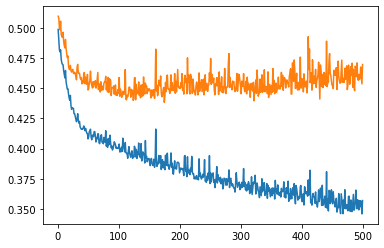

'\nfor t in range(10):\n    out = net(train_x)     # 喂给 net 训练数据 x, 输出分析值\n    #out = torch.max(F.softmax(out, dim=1), 1)[1].type(torch.FloatTensor)\n    #print(out,train_y)#.squeeze()\n    loss = loss_func(out, train_y)#.squeeze()     # 计算两者的误差\n    optimizer.zero_grad()   \n    loss.backward()         \n    optimizer.step()        \n'

In [6]:

#net = Net(n_feature=points, n_hidden=10, n_output=1) # 几个类别就几个 output

#便于随着训练的进行观察数值的变化
train_loss=[]
test_loss=[]
min_loss=1
max_acc=0.1

def trans(pred):
    P=[]
    for i  in pred:
        if i>=0.5:
            i=[1]
        else:
            i=[0]
        P.append(i)
    pred = torch.Tensor(P)
    return pred

def accury(pred,y):
    #print(pred)
    pred = trans(pred)
    #print(pred,y)
    #print(sum(pred == y),sum(pred != y),len(y))
    return sum(pred == y)/len(y)*100

#获得这个模型
model = Net(n_feature=points)
#优化函数 优化的是模型所有变量即model.parameters()
optim = torch.optim.Adam(model.parameters(),lr=0.001)  #lr=0.0001  #选择使用哪种优化器 761个数据集用这个优化器
#optim = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.3)   # lr=0.01,momentum=0.3

# 训练网络
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
loss_fn =nn.BCELoss()#nn.CrossEntropyLoss()##nn.BCEWithLogitsLoss()# #

for epoch in range(epochs):
    for x,y in train_dl:
        y_pred = model(x)
        #print(y_pred,y)
        loss = loss_fn(y_pred, y)
        #print(loss)
        # 梯度置为0
        optim.zero_grad()
        # 反向传播求解梯度
        loss.backward()
        # 优化
        optim.step()
        
    # 不需要进行梯度计算
    with torch.no_grad():
        epoch_loss = loss_fn(model(train_x), train_y).data
        epoch_acc = accury(model(train_x), train_y).numpy()
        #print(epoch_acc)
        epoch_test_loss = loss_fn(model(test_x), test_y).data
        start = time.time()
        epoch_test_acc = accury(model(test_x), test_y).numpy()
        end = time.time()
        print('耗时：:',str(end-start))
        #print(epoch_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
        print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
              'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
        train_loss.append(epoch_loss)
        test_loss.append(epoch_test_loss)
        if epoch_test_loss < min_loss:
            min_loss = epoch_test_loss
            print("min loss epoch:"+str(epoch))
            torch.save(model, 'H:/vamf_model/model_patch_6.pth')
            df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(trans(model(test_x)))})  
            #print(df)
        if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
            max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)
            print("max acc epoch："+str(epoch)+"        max acc："+str(max_acc))
            
print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc))        
#print(model(test_x), test_y)
ANN=max_acc

df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(trans(model(test_x)))})
print(df)

plt.plot(range(1,epochs+1),train_loss,label='train_loss')
plt.plot(range(1,epochs+1),test_loss,label='test_loss')
plt.show()

'''
for t in range(10):
    out = net(train_x)     # 喂给 net 训练数据 x, 输出分析值
    #out = torch.max(F.softmax(out, dim=1), 1)[1].type(torch.FloatTensor)
    #print(out,train_y)#.squeeze()
    loss = loss_func(out, train_y)#.squeeze()     # 计算两者的误差
    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()        
'''
#print(target_y,pred_y)

In [228]:
acc=[KNN,Log,DT,RF,AB,SVM,NB,ANN]
model = ['KNN','Logistic','决策树','RF','Adaboost','SVM','朴素贝叶斯','ANN']


[86.49253731343283,
 74.02985074626865,
 98.2089552238806,
 96.7910447761194,
 85.8955223880597,
 83.50746268656717,
 72.31343283582089,
 94.179]

In [188]:
#批量处理patch预测的特征重要性
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from collections import Counter
import torch.nn.functional as Fun
from sklearn.preprocessing import normalize
from sklearn import preprocessing

ACC=[]
for i in range(13):
    N=['keypoint','brightness','contrast','edgeLength',
       'Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	
       'Saturation','Value']
    del N[i]
    print(N)
    data = pd.read_csv("H:/edge_dection/feature_test.csv")########## 
    X = data[N].values
    X = preprocessing.QuantileTransformer(output_distribution="normal").fit_transform(X)
    print(len(X))
    Y = data.label.values.reshape(-1, 1)#######3

    train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
    print(type(train_x))

    #将数据转换成Tensor LongTensor等价于int64
    train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
    train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
    test_x  =torch.from_numpy(test_x).type(torch.FloatTensor)
    test_y  = torch.from_numpy(test_y).type(torch.FloatTensor)
    print(test_x.shape)
    points = int(test_x.shape[1])

    batch = 8#32
    #no_of_batches = len(data)//batch
    epochs = 100#3000

    #TensorDataset()可以对tensor进行打包即合并
    train_ds = TensorDataset(train_x,train_y)
    #希望模型不关注训练集数据顺序故用乱序
    train_dl = DataLoader(train_ds,batch_size=batch)#,shuffle=True
    test_ds = TensorDataset(test_x,test_y)
    #对测试集不需要用乱序避免工作量增加
    test_dl = DataLoader(test_ds,batch_size=batch)

    # 建立神经网络
    class Net(torch.nn.Module):     # 继承 torch 的 Module
        def __init__(self, n_feature):
            super(Net, self).__init__()     # 继承 __init__ 功能
            self.hidden1 = torch.nn.Linear(n_feature, int(n_feature*2))   # 隐藏层线性输出
            self.hidden4 = torch.nn.Linear(int(n_feature*2), int(n_feature))   # 隐藏层线性输出
            self.out = torch.nn.Linear(int(n_feature),1)       # 输出层线性输出
            self.relu = nn.ReLU()  # 模块的激活函数
        
        def forward(self, x):
            # 正向传播输入值, 神经网络分析出输出值
            x = self.relu(self.hidden1(x))   # 激励函数(隐藏层的线性值)
            x = self.relu(self.hidden4(x))
            x = torch.sigmoid(self.out(x)) 
            return x

    #便于随着训练的进行观察数值的变化
    train_loss=[]
    test_loss=[]
    min_loss=1
    max_acc=0.1

    def trans(pred):
        P=[]
        for i  in pred:
            if i>=0.5:
                i=[1]
            else:
                i=[0]
            P.append(i)
        pred = torch.Tensor(P)
        return pred

    def accury(pred,y):
        pred = trans(pred)
        return sum(pred == y)/len(y)

    #获得这个模型
    model = Net(n_feature=points)
    #优化函数 优化的是模型所有变量即model.parameters()
    optim = torch.optim.Adam(model.parameters(),lr=0.001)  #lr=0.0001  #选择使用哪种优化器 761个数据集用这个优化器

    # 训练网络
    # 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
    loss_fn =nn.BCELoss()#nn.CrossEntropyLoss()##nn.BCEWithLogitsLoss()# #

    for epoch in range(epochs):
        for x,y in train_dl:
            y_pred = model(x)
            #print(y_pred,y)
            loss = loss_fn(y_pred, y)
            #print(loss)
            # 梯度置为0
            optim.zero_grad()
            # 反向传播求解梯度
            loss.backward()
            # 优化
            optim.step()
        
        # 不需要进行梯度计算
        with torch.no_grad():
            epoch_loss = loss_fn(model(train_x), train_y).data
            epoch_acc = accury(model(train_x), train_y).numpy()
            #print(epoch_acc)
            epoch_test_loss = loss_fn(model(test_x), test_y).data
            epoch_test_acc = accury(model(test_x), test_y).numpy()
            #print(epoch_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
            print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
                  'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
            train_loss.append(epoch_loss)
            test_loss.append(epoch_test_loss)
            if epoch_test_loss < min_loss:
                min_loss = epoch_test_loss
                print("min loss epoch:"+str(epoch))
                #torch.save(model, 'H:/vamf_model/model_vmaf.pth')
            if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
                max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)
                print("max acc epoch："+str(epoch)+"        max acc："+str(max_acc))
                
    print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc))   
    ACC.append(max_acc)
    
print(ACC)
# list转dataframe
df = pd.DataFrame(ACC, columns=['acc'])
# 保存到本地excel
df.to_excel("F:/video_cut/patch_acc.xlsx", index=False)



['brightness', 'contrast', 'edgeLength', 'Hue1', 'Hue2', 'Hue3', 'Hue4', 'Hue5', 'Hue6', 'Hue7', 'Saturation', 'Value']
6697
<class 'numpy.ndarray'>
torch.Size([1340, 12])
epoch:  0 train_loss:  0.467 train_acc:  0.762 test_loss:  0.488 test_acc:  0.752
min loss epoch:0
max acc epoch：0        max acc：0.752
epoch:  1 train_loss:  0.451 train_acc:  0.765 test_loss:  0.476 test_acc:  0.751
min loss epoch:1
epoch:  2 train_loss:  0.444 train_acc:  0.769 test_loss:  0.471 test_acc:  0.751
min loss epoch:2
epoch:  3 train_loss:  0.438 train_acc:  0.769 test_loss:  0.468 test_acc:  0.746
min loss epoch:3
epoch:  4 train_loss:  0.434 train_acc:  0.772 test_loss:  0.464 test_acc:  0.751
min loss epoch:4
epoch:  5 train_loss:  0.43 train_acc:  0.774 test_loss:  0.462 test_acc:  0.751
min loss epoch:5
epoch:  6 train_loss:  0.426 train_acc:  0.775 test_loss:  0.46 test_acc:  0.746
min loss epoch:6
epoch:  7 train_loss:  0.423 train_acc:  0.778 test_loss:  0.458 test_acc:  0.746
min loss epoch:7
e

epoch:  75 train_loss:  0.304 train_acc:  0.848 test_loss:  0.381 test_acc:  0.804
min loss epoch:75
epoch:  76 train_loss:  0.303 train_acc:  0.847 test_loss:  0.382 test_acc:  0.804
epoch:  77 train_loss:  0.302 train_acc:  0.847 test_loss:  0.38 test_acc:  0.804
min loss epoch:77
epoch:  78 train_loss:  0.301 train_acc:  0.85 test_loss:  0.379 test_acc:  0.806
min loss epoch:78
epoch:  79 train_loss:  0.3 train_acc:  0.848 test_loss:  0.378 test_acc:  0.807
min loss epoch:79
max acc epoch：79        max acc：0.807
epoch:  80 train_loss:  0.299 train_acc:  0.848 test_loss:  0.378 test_acc:  0.809
min loss epoch:80
max acc epoch：80        max acc：0.809
epoch:  81 train_loss:  0.298 train_acc:  0.849 test_loss:  0.378 test_acc:  0.81
max acc epoch：81        max acc：0.81
epoch:  82 train_loss:  0.299 train_acc:  0.85 test_loss:  0.379 test_acc:  0.81
epoch:  83 train_loss:  0.297 train_acc:  0.85 test_loss:  0.378 test_acc:  0.81
epoch:  84 train_loss:  0.296 train_acc:  0.85 test_loss:  

epoch:  51 train_loss:  0.345 train_acc:  0.827 test_loss:  0.419 test_acc:  0.789
min loss epoch:51
max acc epoch：51        max acc：0.789
epoch:  52 train_loss:  0.344 train_acc:  0.828 test_loss:  0.419 test_acc:  0.789
min loss epoch:52
epoch:  53 train_loss:  0.344 train_acc:  0.827 test_loss:  0.419 test_acc:  0.79
max acc epoch：53        max acc：0.79
epoch:  54 train_loss:  0.343 train_acc:  0.828 test_loss:  0.418 test_acc:  0.79
min loss epoch:54
epoch:  55 train_loss:  0.342 train_acc:  0.829 test_loss:  0.418 test_acc:  0.79
min loss epoch:55
epoch:  56 train_loss:  0.341 train_acc:  0.831 test_loss:  0.416 test_acc:  0.793
min loss epoch:56
max acc epoch：56        max acc：0.793
epoch:  57 train_loss:  0.34 train_acc:  0.831 test_loss:  0.416 test_acc:  0.795
min loss epoch:57
max acc epoch：57        max acc：0.795
epoch:  58 train_loss:  0.339 train_acc:  0.831 test_loss:  0.415 test_acc:  0.793
min loss epoch:58
epoch:  59 train_loss:  0.338 train_acc:  0.831 test_loss:  0.4

epoch:  22 train_loss:  0.369 train_acc:  0.814 test_loss:  0.411 test_acc:  0.782
min loss epoch:22
epoch:  23 train_loss:  0.365 train_acc:  0.816 test_loss:  0.407 test_acc:  0.783
min loss epoch:23
epoch:  24 train_loss:  0.363 train_acc:  0.82 test_loss:  0.404 test_acc:  0.786
min loss epoch:24
max acc epoch：24        max acc：0.786
epoch:  25 train_loss:  0.359 train_acc:  0.823 test_loss:  0.401 test_acc:  0.79
min loss epoch:25
max acc epoch：25        max acc：0.79
epoch:  26 train_loss:  0.357 train_acc:  0.824 test_loss:  0.4 test_acc:  0.79
min loss epoch:26
epoch:  27 train_loss:  0.353 train_acc:  0.823 test_loss:  0.396 test_acc:  0.794
min loss epoch:27
max acc epoch：27        max acc：0.794
epoch:  28 train_loss:  0.35 train_acc:  0.826 test_loss:  0.394 test_acc:  0.796
min loss epoch:28
max acc epoch：28        max acc：0.796
epoch:  29 train_loss:  0.347 train_acc:  0.826 test_loss:  0.392 test_acc:  0.8
min loss epoch:29
max acc epoch：29        max acc：0.8
epoch:  30 tr

epoch:  0 train_loss:  0.471 train_acc:  0.754 test_loss:  0.493 test_acc:  0.743
min loss epoch:0
max acc epoch：0        max acc：0.743
epoch:  1 train_loss:  0.454 train_acc:  0.759 test_loss:  0.479 test_acc:  0.744
min loss epoch:1
max acc epoch：1        max acc：0.744
epoch:  2 train_loss:  0.445 train_acc:  0.764 test_loss:  0.474 test_acc:  0.745
min loss epoch:2
max acc epoch：2        max acc：0.745
epoch:  3 train_loss:  0.437 train_acc:  0.771 test_loss:  0.469 test_acc:  0.75
min loss epoch:3
max acc epoch：3        max acc：0.75
epoch:  4 train_loss:  0.432 train_acc:  0.777 test_loss:  0.466 test_acc:  0.756
min loss epoch:4
max acc epoch：4        max acc：0.756
epoch:  5 train_loss:  0.428 train_acc:  0.779 test_loss:  0.463 test_acc:  0.757
min loss epoch:5
max acc epoch：5        max acc：0.757
epoch:  6 train_loss:  0.423 train_acc:  0.783 test_loss:  0.461 test_acc:  0.758
min loss epoch:6
max acc epoch：6        max acc：0.758
epoch:  7 train_loss:  0.42 train_acc:  0.783 test

epoch:  76 train_loss:  0.33 train_acc:  0.84 test_loss:  0.416 test_acc:  0.793
epoch:  77 train_loss:  0.329 train_acc:  0.84 test_loss:  0.414 test_acc:  0.796
epoch:  78 train_loss:  0.328 train_acc:  0.842 test_loss:  0.415 test_acc:  0.795
epoch:  79 train_loss:  0.328 train_acc:  0.842 test_loss:  0.415 test_acc:  0.793
epoch:  80 train_loss:  0.327 train_acc:  0.842 test_loss:  0.414 test_acc:  0.797
max acc epoch：80        max acc：0.797
epoch:  81 train_loss:  0.326 train_acc:  0.842 test_loss:  0.413 test_acc:  0.799
max acc epoch：81        max acc：0.799
epoch:  82 train_loss:  0.326 train_acc:  0.843 test_loss:  0.413 test_acc:  0.803
max acc epoch：82        max acc：0.803
epoch:  83 train_loss:  0.325 train_acc:  0.843 test_loss:  0.413 test_acc:  0.802
epoch:  84 train_loss:  0.324 train_acc:  0.843 test_loss:  0.413 test_acc:  0.801
epoch:  85 train_loss:  0.324 train_acc:  0.843 test_loss:  0.412 test_acc:  0.801
epoch:  86 train_loss:  0.323 train_acc:  0.845 test_loss: 

epoch:  52 train_loss:  0.338 train_acc:  0.833 test_loss:  0.404 test_acc:  0.787
min loss epoch:52
epoch:  53 train_loss:  0.336 train_acc:  0.838 test_loss:  0.403 test_acc:  0.789
min loss epoch:53
epoch:  54 train_loss:  0.335 train_acc:  0.837 test_loss:  0.403 test_acc:  0.793
max acc epoch：54        max acc：0.793
epoch:  55 train_loss:  0.334 train_acc:  0.837 test_loss:  0.403 test_acc:  0.793
min loss epoch:55
epoch:  56 train_loss:  0.333 train_acc:  0.839 test_loss:  0.402 test_acc:  0.793
min loss epoch:56
epoch:  57 train_loss:  0.333 train_acc:  0.839 test_loss:  0.402 test_acc:  0.792
min loss epoch:57
epoch:  58 train_loss:  0.331 train_acc:  0.84 test_loss:  0.4 test_acc:  0.797
min loss epoch:58
max acc epoch：58        max acc：0.797
epoch:  59 train_loss:  0.33 train_acc:  0.84 test_loss:  0.4 test_acc:  0.793
epoch:  60 train_loss:  0.329 train_acc:  0.84 test_loss:  0.4 test_acc:  0.796
min loss epoch:60
epoch:  61 train_loss:  0.328 train_acc:  0.84 test_loss:  0.

epoch:  25 train_loss:  0.353 train_acc:  0.826 test_loss:  0.41 test_acc:  0.794
min loss epoch:25
epoch:  26 train_loss:  0.351 train_acc:  0.827 test_loss:  0.409 test_acc:  0.792
min loss epoch:26
epoch:  27 train_loss:  0.348 train_acc:  0.829 test_loss:  0.408 test_acc:  0.79
min loss epoch:27
epoch:  28 train_loss:  0.347 train_acc:  0.828 test_loss:  0.407 test_acc:  0.795
min loss epoch:28
epoch:  29 train_loss:  0.344 train_acc:  0.831 test_loss:  0.404 test_acc:  0.795
min loss epoch:29
epoch:  30 train_loss:  0.342 train_acc:  0.83 test_loss:  0.403 test_acc:  0.796
min loss epoch:30
max acc epoch：30        max acc：0.796
epoch:  31 train_loss:  0.34 train_acc:  0.831 test_loss:  0.402 test_acc:  0.797
min loss epoch:31
max acc epoch：31        max acc：0.797
epoch:  32 train_loss:  0.339 train_acc:  0.832 test_loss:  0.402 test_acc:  0.796
epoch:  33 train_loss:  0.338 train_acc:  0.83 test_loss:  0.401 test_acc:  0.794
min loss epoch:33
epoch:  34 train_loss:  0.335 train_ac

epoch:  5 train_loss:  0.416 train_acc:  0.786 test_loss:  0.456 test_acc:  0.755
min loss epoch:5
epoch:  6 train_loss:  0.411 train_acc:  0.79 test_loss:  0.454 test_acc:  0.751
min loss epoch:6
epoch:  7 train_loss:  0.407 train_acc:  0.791 test_loss:  0.451 test_acc:  0.758
min loss epoch:7
max acc epoch：7        max acc：0.758
epoch:  8 train_loss:  0.403 train_acc:  0.791 test_loss:  0.449 test_acc:  0.76
min loss epoch:8
max acc epoch：8        max acc：0.76
epoch:  9 train_loss:  0.4 train_acc:  0.794 test_loss:  0.447 test_acc:  0.761
min loss epoch:9
max acc epoch：9        max acc：0.761
epoch:  10 train_loss:  0.397 train_acc:  0.796 test_loss:  0.446 test_acc:  0.761
min loss epoch:10
epoch:  11 train_loss:  0.395 train_acc:  0.797 test_loss:  0.445 test_acc:  0.764
min loss epoch:11
max acc epoch：11        max acc：0.764
epoch:  12 train_loss:  0.392 train_acc:  0.798 test_loss:  0.444 test_acc:  0.766
min loss epoch:12
max acc epoch：12        max acc：0.766
epoch:  13 train_los

epoch:  79 train_loss:  0.304 train_acc:  0.851 test_loss:  0.378 test_acc:  0.805
min loss epoch:79
epoch:  80 train_loss:  0.304 train_acc:  0.851 test_loss:  0.378 test_acc:  0.807
epoch:  81 train_loss:  0.303 train_acc:  0.852 test_loss:  0.377 test_acc:  0.808
min loss epoch:81
epoch:  82 train_loss:  0.301 train_acc:  0.852 test_loss:  0.376 test_acc:  0.81
min loss epoch:82
max acc epoch：82        max acc：0.81
epoch:  83 train_loss:  0.301 train_acc:  0.854 test_loss:  0.376 test_acc:  0.81
min loss epoch:83
epoch:  84 train_loss:  0.3 train_acc:  0.854 test_loss:  0.375 test_acc:  0.81
min loss epoch:84
epoch:  85 train_loss:  0.299 train_acc:  0.854 test_loss:  0.374 test_acc:  0.809
min loss epoch:85
epoch:  86 train_loss:  0.298 train_acc:  0.856 test_loss:  0.374 test_acc:  0.811
min loss epoch:86
max acc epoch：86        max acc：0.811
epoch:  87 train_loss:  0.298 train_acc:  0.855 test_loss:  0.374 test_acc:  0.811
min loss epoch:87
epoch:  88 train_loss:  0.297 train_acc

epoch:  53 train_loss:  0.332 train_acc:  0.834 test_loss:  0.413 test_acc:  0.79
epoch:  54 train_loss:  0.331 train_acc:  0.834 test_loss:  0.414 test_acc:  0.79
epoch:  55 train_loss:  0.33 train_acc:  0.836 test_loss:  0.414 test_acc:  0.79
epoch:  56 train_loss:  0.33 train_acc:  0.836 test_loss:  0.414 test_acc:  0.793
epoch:  57 train_loss:  0.329 train_acc:  0.835 test_loss:  0.412 test_acc:  0.794
min loss epoch:57
max acc epoch：57        max acc：0.794
epoch:  58 train_loss:  0.329 train_acc:  0.836 test_loss:  0.413 test_acc:  0.793
epoch:  59 train_loss:  0.328 train_acc:  0.836 test_loss:  0.412 test_acc:  0.794
min loss epoch:59
epoch:  60 train_loss:  0.327 train_acc:  0.836 test_loss:  0.412 test_acc:  0.795
max acc epoch：60        max acc：0.795
epoch:  61 train_loss:  0.326 train_acc:  0.837 test_loss:  0.413 test_acc:  0.794
epoch:  62 train_loss:  0.326 train_acc:  0.838 test_loss:  0.413 test_acc:  0.796
max acc epoch：62        max acc：0.796
epoch:  63 train_loss:  0

epoch:  34 train_loss:  0.358 train_acc:  0.821 test_loss:  0.41 test_acc:  0.785
min loss epoch:34
max acc epoch：34        max acc：0.785
epoch:  35 train_loss:  0.356 train_acc:  0.821 test_loss:  0.408 test_acc:  0.79
min loss epoch:35
max acc epoch：35        max acc：0.79
epoch:  36 train_loss:  0.355 train_acc:  0.822 test_loss:  0.407 test_acc:  0.787
min loss epoch:36
epoch:  37 train_loss:  0.353 train_acc:  0.823 test_loss:  0.407 test_acc:  0.79
min loss epoch:37
epoch:  38 train_loss:  0.351 train_acc:  0.825 test_loss:  0.405 test_acc:  0.792
min loss epoch:38
max acc epoch：38        max acc：0.792
epoch:  39 train_loss:  0.35 train_acc:  0.826 test_loss:  0.404 test_acc:  0.79
min loss epoch:39
epoch:  40 train_loss:  0.348 train_acc:  0.826 test_loss:  0.403 test_acc:  0.79
min loss epoch:40
epoch:  41 train_loss:  0.347 train_acc:  0.827 test_loss:  0.403 test_acc:  0.787
min loss epoch:41
epoch:  42 train_loss:  0.345 train_acc:  0.828 test_loss:  0.401 test_acc:  0.791
mi

epoch:  6 train_loss:  0.421 train_acc:  0.777 test_loss:  0.451 test_acc:  0.753
min loss epoch:6
max acc epoch：6        max acc：0.753
epoch:  7 train_loss:  0.416 train_acc:  0.78 test_loss:  0.448 test_acc:  0.756
min loss epoch:7
max acc epoch：7        max acc：0.756
epoch:  8 train_loss:  0.412 train_acc:  0.782 test_loss:  0.445 test_acc:  0.761
min loss epoch:8
max acc epoch：8        max acc：0.761
epoch:  9 train_loss:  0.408 train_acc:  0.785 test_loss:  0.443 test_acc:  0.762
min loss epoch:9
max acc epoch：9        max acc：0.762
epoch:  10 train_loss:  0.405 train_acc:  0.785 test_loss:  0.44 test_acc:  0.762
min loss epoch:10
epoch:  11 train_loss:  0.402 train_acc:  0.785 test_loss:  0.438 test_acc:  0.762
min loss epoch:11
epoch:  12 train_loss:  0.399 train_acc:  0.788 test_loss:  0.437 test_acc:  0.761
min loss epoch:12
epoch:  13 train_loss:  0.397 train_acc:  0.789 test_loss:  0.435 test_acc:  0.767
min loss epoch:13
max acc epoch：13        max acc：0.767
epoch:  14 train

epoch:  83 train_loss:  0.333 train_acc:  0.834 test_loss:  0.393 test_acc:  0.8
epoch:  84 train_loss:  0.333 train_acc:  0.834 test_loss:  0.392 test_acc:  0.796
epoch:  85 train_loss:  0.333 train_acc:  0.833 test_loss:  0.392 test_acc:  0.799
epoch:  86 train_loss:  0.331 train_acc:  0.834 test_loss:  0.391 test_acc:  0.798
min loss epoch:86
epoch:  87 train_loss:  0.33 train_acc:  0.834 test_loss:  0.39 test_acc:  0.799
min loss epoch:87
epoch:  88 train_loss:  0.329 train_acc:  0.835 test_loss:  0.39 test_acc:  0.799
epoch:  89 train_loss:  0.328 train_acc:  0.835 test_loss:  0.389 test_acc:  0.798
min loss epoch:89
epoch:  90 train_loss:  0.326 train_acc:  0.839 test_loss:  0.387 test_acc:  0.804
min loss epoch:90
max acc epoch：90        max acc：0.804
epoch:  91 train_loss:  0.326 train_acc:  0.838 test_loss:  0.388 test_acc:  0.803
epoch:  92 train_loss:  0.323 train_acc:  0.84 test_loss:  0.384 test_acc:  0.807
min loss epoch:92
max acc epoch：92        max acc：0.807
epoch:  93

epoch:  56 train_loss:  0.318 train_acc:  0.844 test_loss:  0.387 test_acc:  0.804
min loss epoch:56
epoch:  57 train_loss:  0.317 train_acc:  0.846 test_loss:  0.387 test_acc:  0.808
min loss epoch:57
max acc epoch：57        max acc：0.808
epoch:  58 train_loss:  0.316 train_acc:  0.845 test_loss:  0.385 test_acc:  0.81
min loss epoch:58
max acc epoch：58        max acc：0.81
epoch:  59 train_loss:  0.315 train_acc:  0.845 test_loss:  0.385 test_acc:  0.808
min loss epoch:59
epoch:  60 train_loss:  0.315 train_acc:  0.842 test_loss:  0.385 test_acc:  0.806
min loss epoch:60
epoch:  61 train_loss:  0.313 train_acc:  0.846 test_loss:  0.383 test_acc:  0.81
min loss epoch:61
epoch:  62 train_loss:  0.313 train_acc:  0.845 test_loss:  0.381 test_acc:  0.808
min loss epoch:62
epoch:  63 train_loss:  0.311 train_acc:  0.846 test_loss:  0.38 test_acc:  0.805
min loss epoch:63
epoch:  64 train_loss:  0.31 train_acc:  0.845 test_loss:  0.379 test_acc:  0.81
min loss epoch:64
epoch:  65 train_loss

epoch:  29 train_loss:  0.371 train_acc:  0.805 test_loss:  0.425 test_acc:  0.779
min loss epoch:29
epoch:  30 train_loss:  0.369 train_acc:  0.807 test_loss:  0.424 test_acc:  0.781
min loss epoch:30
epoch:  31 train_loss:  0.368 train_acc:  0.807 test_loss:  0.424 test_acc:  0.778
min loss epoch:31
epoch:  32 train_loss:  0.366 train_acc:  0.807 test_loss:  0.424 test_acc:  0.776
min loss epoch:32
epoch:  33 train_loss:  0.364 train_acc:  0.809 test_loss:  0.422 test_acc:  0.778
min loss epoch:33
epoch:  34 train_loss:  0.363 train_acc:  0.811 test_loss:  0.422 test_acc:  0.775
min loss epoch:34
epoch:  35 train_loss:  0.361 train_acc:  0.811 test_loss:  0.421 test_acc:  0.775
min loss epoch:35
epoch:  36 train_loss:  0.36 train_acc:  0.814 test_loss:  0.421 test_acc:  0.777
min loss epoch:36
epoch:  37 train_loss:  0.358 train_acc:  0.813 test_loss:  0.42 test_acc:  0.779
min loss epoch:37
epoch:  38 train_loss:  0.357 train_acc:  0.814 test_loss:  0.419 test_acc:  0.781
min loss e

epoch:  4 train_loss:  0.43 train_acc:  0.775 test_loss:  0.461 test_acc:  0.749
min loss epoch:4
max acc epoch：4        max acc：0.749
epoch:  5 train_loss:  0.424 train_acc:  0.777 test_loss:  0.456 test_acc:  0.751
min loss epoch:5
max acc epoch：5        max acc：0.751
epoch:  6 train_loss:  0.419 train_acc:  0.782 test_loss:  0.453 test_acc:  0.754
min loss epoch:6
max acc epoch：6        max acc：0.754
epoch:  7 train_loss:  0.415 train_acc:  0.786 test_loss:  0.45 test_acc:  0.757
min loss epoch:7
max acc epoch：7        max acc：0.757
epoch:  8 train_loss:  0.412 train_acc:  0.789 test_loss:  0.447 test_acc:  0.763
min loss epoch:8
max acc epoch：8        max acc：0.763
epoch:  9 train_loss:  0.408 train_acc:  0.79 test_loss:  0.444 test_acc:  0.768
min loss epoch:9
max acc epoch：9        max acc：0.768
epoch:  10 train_loss:  0.405 train_acc:  0.793 test_loss:  0.441 test_acc:  0.769
min loss epoch:10
max acc epoch：10        max acc：0.769
epoch:  11 train_loss:  0.402 train_acc:  0.793 

epoch:  79 train_loss:  0.297 train_acc:  0.851 test_loss:  0.368 test_acc:  0.813
epoch:  80 train_loss:  0.297 train_acc:  0.85 test_loss:  0.368 test_acc:  0.813
epoch:  81 train_loss:  0.297 train_acc:  0.851 test_loss:  0.367 test_acc:  0.814
min loss epoch:81
epoch:  82 train_loss:  0.295 train_acc:  0.852 test_loss:  0.366 test_acc:  0.816
min loss epoch:82
max acc epoch：82        max acc：0.816
epoch:  83 train_loss:  0.295 train_acc:  0.852 test_loss:  0.366 test_acc:  0.813
epoch:  84 train_loss:  0.295 train_acc:  0.852 test_loss:  0.367 test_acc:  0.814
epoch:  85 train_loss:  0.293 train_acc:  0.854 test_loss:  0.365 test_acc:  0.816
min loss epoch:85
epoch:  86 train_loss:  0.292 train_acc:  0.852 test_loss:  0.364 test_acc:  0.816
min loss epoch:86
epoch:  87 train_loss:  0.291 train_acc:  0.853 test_loss:  0.364 test_acc:  0.815
min loss epoch:87
epoch:  88 train_loss:  0.29 train_acc:  0.854 test_loss:  0.362 test_acc:  0.816
min loss epoch:88
epoch:  89 train_loss:  0.

In [14]:
 N=['keypoint','brightness','contrast','edgeLength',
       'Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	
       'Saturation','Value','TI','SI','Size']
N

['keypoint',
 'brightness',
 'contrast',
 'edgeLength',
 'Hue1',
 'Hue2',
 'Hue3',
 'Hue4',
 'Hue5',
 'Hue6',
 'Hue7',
 'Saturation',
 'Value',
 'TI',
 'SI',
 'Size']

In [41]:
#批量处理patch预测的特征重要性
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from collections import Counter
import torch.nn.functional as Fun
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn import tree

# 训练决策树
def trainDT(x_train, y_train):
    # DT生成和训练
    clf = tree.DecisionTreeClassifier(criterion='entropy')#ID3分类树，信息增益特征选择
    clf.fit(x_train, y_train)
    return clf

ACC=[]
for i in range(-1,16):
    N=['keypoint','brightness','contrast','edgeLength',
       'Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	
       'Saturation','Value','TI','SI','Size']
    if i != -1:
        del N[i]
        print(N)
    data = pd.read_excel("H:/edge_dection/feature_test.xlsx")########## 
    X = data[N].values
    X = preprocessing.QuantileTransformer(output_distribution="normal").fit_transform(X)
    #print(len(X))
    Y = data.label.values.reshape(-1, 1)#######3
    
    train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=10)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行

    model = trainDT(train_x, train_y.ravel())
    test(model,test_x, test_y.ravel())
    acc = accury(model,test_x,test_y.ravel())
    ACC.append(acc)
print(ACC)
# list转dataframe
df = pd.DataFrame(ACC, columns=['acc'])
# 保存到本地excel
df.to_excel("F:/video_cut/patch_tree_acc.xlsx", index=False)

[0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[685  12]
 [ 16 627]]
accuracy:0.9791044776119403
precision:0.9791044776119403
recall:0.9791044776119403
f1-score:0.9791044776119403
97.91044776119404
['brightness', 'contrast', 'edgeLength', 'Hue1', 'Hue2', 'Hue3', 'Hue4', 'Hue5', 'Hue6', 'Hue7', 'Saturation', 'Value', 'TI', 'SI', 'Size']
[0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusion_matrix:
 [[683  14]
 [ 23 620]]
accuracy:0.9723880597014926
precision:0.9723880597014926
recall:0.9723880597014926
f1-score:0.9723880597014926
97.23880597014926
['keypoint', 'contrast', 'edgeLength', 'Hue1', 'Hue2', 'Hue3', 'Hue4', 'Hue5', 'Hue6', 'Hue7', 'Saturation', 'Value', 'TI', 'SI', 'Size']
[1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1] [0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1]
confusio